In [1]:
# import sys
# !{sys.executable} -m pip install tqdm
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import h5py



In [2]:
!ls /data/data3/seadasn/

copyErrors.txt
decimator_2022-11-02_16.51.33_GMT_000700.raw
decimator_2022-11-17_00-00-00_GMT.h5
decimator_2022-11-17_18.57.00_GMT.h5
decimator_2022-11-17_18.58.00_GMT.h5
decimator_2022-11-17_19.00.00_GMT.h5
decimator_2022-11-17_19.01.00_GMT.h5
decimator_2022-11-17_19.02.00_GMT.h5
decimator_2022-11-17_19.03.00_GMT.h5
decimator_2022-11-17_19-04-00_GMT.h5
decimator_2022-11-17_19.07.00_GMT.h5
decimator_2022-11-17_19.08.00_GMT.h5
decimator_2022-11-17_19.10.00_GMT.h5
decimator_2022-11-17_19-12-00_GMT.h5
decimator_2022-11-17_19-13-00_GMT.h5
decimator_2022-11-17_19.14.00_GMT.h5
decimator_2022-11-17_19.15.00_GMT.h5
decimator_2022-11-17_19.16.00_GMT.h5
decimator_2022-11-17_19.17.00_GMT.h5
decimator_2022-11-17_19.18.00_GMT.h5
decimator_2022-11-17_19-19-00_GMT.h5
decimator_2022-11-17_19-20-00_GMT.h5
decimator_2022-11-17_19-21-00_GMT.h5
decimator_2022-11-17_19.22.00_GMT.h5
decimator_2022-11-17_19.23.00_GMT.h5
decimator_2022-11-17_19-24-00_GMT.h5
decimator_2022-11-17_19.25.00_GMT.h5
decimator_2022-

seadasn_2022-10-15_13-30-00_UTC_015446.h5
seadasn_2022-10-15_13-31-00_UTC_015447.h5
seadasn_2022-10-15_13-32-00_UTC_015448.h5
seadasn_2022-10-15_13-33-00_UTC_015449.h5
seadasn_2022-10-15_13-34-00_UTC_015450.h5
seadasn_2022-10-15_13-35-00_UTC_015451.h5
seadasn_2022-10-15_13-36-00_UTC_015452.h5
seadasn_2022-10-15_13-37-00_UTC_015453.h5
seadasn_2022-10-15_13-38-00_UTC_015454.h5
seadasn_2022-10-15_13-39-00_UTC_015455.h5
seadasn_2022-10-15_13-40-00_UTC_015456.h5
seadasn_2022-10-15_13-41-00_UTC_015457.h5
seadasn_2022-10-15_13-42-00_UTC_015458.h5
seadasn_2022-10-15_13-43-00_UTC_015459.h5
seadasn_2022-10-15_13-44-00_UTC_015460.h5
seadasn_2022-10-15_13-45-00_UTC_015461.h5
seadasn_2022-10-15_13-46-00_UTC_015462.h5
seadasn_2022-10-15_13-47-00_UTC_015463.h5
seadasn_2022-10-15_13-48-00_UTC_015464.h5
seadasn_2022-10-15_13-49-00_UTC_015465.h5
seadasn_2022-10-15_13-50-00_UTC_015466.h5
seadasn_2022-10-15_13-51-00_UTC_015467.h5
seadasn_2022-10-15_13-52-00_UTC_015468.h5
seadasn_2022-10-15_13-53-00_UTC_01

seadasn_2022-10-24_15-22-00_UTC_028479.h5
seadasn_2022-10-24_15-23-00_UTC_028480.h5
seadasn_2022-10-24_15-24-00_UTC_028481.h5
seadasn_2022-10-24_15-25-00_UTC_028482.h5
seadasn_2022-10-24_15-26-00_UTC_028483.h5
seadasn_2022-10-24_15-27-00_UTC_028484.h5
seadasn_2022-10-24_15-28-00_UTC_028485.h5
seadasn_2022-10-24_15-29-00_UTC_028486.h5
seadasn_2022-10-24_15-30-00_UTC_028487.h5
seadasn_2022-10-24_15-31-00_UTC_028488.h5
seadasn_2022-10-24_15-32-00_UTC_028489.h5
seadasn_2022-10-24_15-33-00_UTC_028490.h5
seadasn_2022-10-24_15-34-00_UTC_028491.h5
seadasn_2022-10-24_15-35-00_UTC_028492.h5
seadasn_2022-10-24_15-36-00_UTC_028493.h5
seadasn_2022-10-24_15-37-00_UTC_028494.h5
seadasn_2022-10-24_15-38-00_UTC_028495.h5
seadasn_2022-10-24_15-39-00_UTC_028496.h5
seadasn_2022-10-24_15-40-00_UTC_028497.h5
seadasn_2022-10-24_15-41-00_UTC_028498.h5
seadasn_2022-10-24_15-42-00_UTC_028499.h5
seadasn_2022-10-24_15-43-00_UTC_028500.h5
seadasn_2022-10-24_15-44-00_UTC_028501.h5
seadasn_2022-10-24_15-45-00_UTC_02

seadasn_2022-11-07_18-39-00_GMT.h5
seadasn_2022-11-07_18-40-00_GMT.h5
seadasn_2022-11-07_18-41-00_GMT.h5
seadasn_2022-11-07_18-42-00_GMT.h5
seadasn_2022-11-07_18-43-00_GMT.h5
seadasn_2022-11-07_18-44-00_GMT.h5
seadasn_2022-11-07_18-45-00_GMT.h5
seadasn_2022-11-07_18-46-00_GMT.h5
seadasn_2022-11-07_18-47-00_GMT.h5
seadasn_2022-11-07_18-48-00_GMT.h5
seadasn_2022-11-07_18-49-00_GMT.h5
seadasn_2022-11-07_18-50-00_GMT.h5
seadasn_2022-11-07_18-51-00_GMT.h5
seadasn_2022-11-07_18-52-00_GMT.h5
seadasn_2022-11-07_18-53-00_GMT.h5
seadasn_2022-11-07_18-54-00_GMT.h5
seadasn_2022-11-07_18-55-00_GMT.h5
seadasn_2022-11-07_18-56-00_GMT.h5
seadasn_2022-11-07_18-57-00_GMT.h5
seadasn_2022-11-07_18-58-00_GMT.h5
seadasn_2022-11-07_18-59-00_GMT.h5
seadasn_2022-11-07_19-00-00_GMT.h5
seadasn_2022-11-07_19-01-00_GMT.h5
seadasn_2022-11-07_19-02-00_GMT.h5
seadasn_2022-11-07_19-03-00_GMT.h5
seadasn_2022-11-07_19-04-00_GMT.h5
seadasn_2022-11-07_19-05-00_GMT.h5
seadasn_2022-11-07_19-06-00_GMT.h5
seadasn_2022-11-07_1

11-10_02-15-00
0 [1380, 1500]


ValueError: Digital filter critical frequencies must be 0 < Wn < fs/2 (fs=3000 -> fs/2=1500.0)

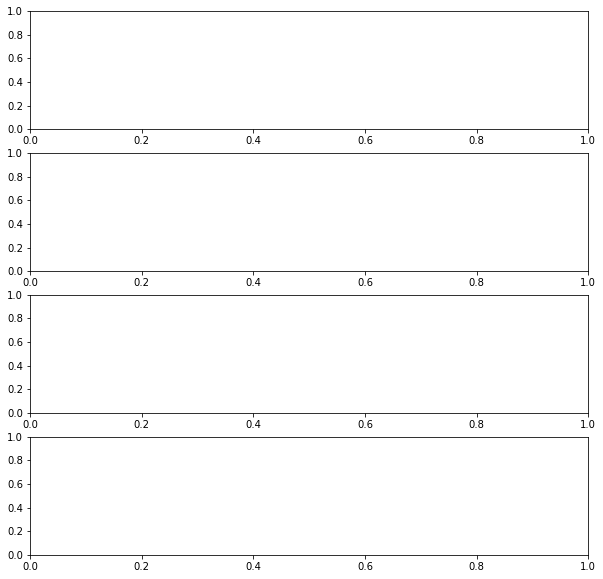

In [26]:
# !ls /data/data7/seadasn_2022-06-21_2022-10-06
data_dir = '/data/data3/seadasn/'

bell1 = 1395
bell2 = 2156
bell3 = 2859
bell4 = 3750
bells1 = [
#     10/69.41,
#     10/46.38,
#     10/34.97,
#     10/26.66
    
    [0.00072,0.00071],
    [0.00047, 0.00046],
    [0.000354, 0.000356],
    [0.00027,0.00028]
]
bells2 = [
    [1/7.55, 1/6.00],
    [1/4.95, 1/4.55],
    [1/3.75, 1/3.45],
    [1/2.85, 1/2.65]
]

bells3 = [
    [1380, 1500],
    [1100, 1500],
    [1100, 1500],
    [1100, 1500],
]

trains1 = [
    [1, 2],
    [20,30],
    [50,80],
    [950, 1050],
]
for n in range(15, 19, 1):
    if n < 10:
        date = f'11-10_02-0{n}-00'
        
    if n >= 10:
        date = f'11-10_02-{n}-00'
# date = '11-10_02-18'
    for file in ((os.listdir(data_dir))):
        if date in file:
            print(file[13:27])
            data_file = data_dir + file
            data = h5py.File(data_file,'r')
            phi = np.array(data['Acquisition/Raw[0]/RawData'])
            fig, axes = plt.subplots(4, 1, figsize=(10,10))
            for n, freq in enumerate(bells3):
                print(n, freq)
                [b,a] = butter(
                    2,
                    freq, 
                    'bandpass', 
                    fs = 3000
                )


                phi_filt = filtfilt(b, a, phi, axis=0)

    #                 vm = 0.0001
                if n == 0:
                    vm = 0.01
                if n == 1:
                    vm = 0.001
                if n == 2:
                    vm = 0.0001
                if n == 3:
                    vm = 0.00001
                plt.subplot(4, 1, n + 1)
                c = plt.imshow(
                    phi_filt,
                    extent=[0,29.9,0,(60)],
                    vmin = -vm,
                    vmax = vm,
                    aspect='auto'
                )
                plt.colorbar(c)
                plt.xlabel('Optical Distance (km)')
                plt.ylabel('Time (s)')

    #             # university station
    #             plt.xlim([0.964,1.311])
                # university station
#                 plt.xlim([0.9,1.5])

    #                 #full cable
    #                 plt.xlim([0,29.9])

    #                 # roosevelt
    #                 plt.xlim([3.621,3.704])


                fig.set_facecolor('w')

            sound_list = bells3
            title = []
            for n, sound in enumerate(sound_list):

                title1 = sound_list[n][0]
                title2 = sound_list[n][1]
                title.append([title1, title2])

            axes[0].set_title(f'{np.round(title[0][0], 2)} - {np.round(title[0][1], 2)} Hz')
            axes[1].set_title(f'{np.round(title[1][0], 2)} - {np.round(title[1][1], 2)} Hz')
            axes[2].set_title(f'{np.round(title[2][0], 2)} - {np.round(title[2][1], 2)} Hz')
            axes[3].set_title(f'{np.round(title[3][0], 2)} - {np.round(title[3][1], 2)} Hz')

            plt.tight_layout()
            plt.show()
    #             break
    #         break
    #     break
        #             phi_filt = filtfilt(b, a, phi, axis=0)
    #     #         fig, ax = plt.subplots(figsize=(10,5))
    #             vm = 0.01
    #             plt.subplot(2, 1, 2)
    #             c = plt.imshow(
    #                 phi_filt,
    #                 extent=[0,29.9,0,60],
    #                 vmin = -vm,
    #                 vmax = vm,
    #                 aspect='auto'
    #             )
    #             plt.colorbar(c)
    #             plt.xlabel('Optical Distance (km)')
    #             plt.ylabel('Time (s)')
    #             plt.xlim([0.960,1.321])
    # #             plt.xlim([0, 29.9])
    # #             plt.xlim([2.364,3.468])
    #             fig.set_facecolor('w')
    #             plt.tight_layout()
    #             plt.show()



In [ ]:
file = 'seadasn_2022-10-05_08-56-00_UTC_038572.h5'
data_file = data_dir + file
data_file

In [ ]:
data = h5py.File(data_file,'r')

In [ ]:
phi = np.array(data['Acquisition/Raw[0]/RawData'])

In [ ]:
phi.shape

In [ ]:
# [b,a] = butter(2, 10/50, 'high')
[b,a] = butter(2, 10/50, 'high')


phi_filt = filtfilt(b, a, phi, axis=0)

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
vm = 0.01
c = plt.imshow(
    phi_filt,
    extent=[0,29.9,0,60],
    vmin = -vm,
    vmax = vm,
    aspect='auto'
)
plt.colorbar(c)
plt.xlabel('Optical Distance (km)')
plt.ylabel('Time (s)')
plt.xlim([0.999,1.292])
fig.set_facecolor('w')
plt.show()